<a href="https://colab.research.google.com/github/pismacx/Python_Data_Analytics/blob/main/NBA_DRAFT_ANALYSIS_1989_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **-NBA DRAFT PLAYERS ANALYSIS-**
---
> This project is focused on analysing data about players drafted to NBA in years 1989-2021

Dataset comes from: [kaggle - dataset](https://www.kaggle.com/datasets/mattop/nba-draft-basketball-player-data-19892021/code?resource=download)





### **Importing libraries.**

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

###  **Import dataset.**

In [31]:
data = pd.read_csv('nbaplayersdraft.csv')
data.head(5)

,id,year,rank,overall_pick,team,player,college,years_active,games,minutes_played,...,3_point_percentage,free_throw_percentage,average_minutes_played,points_per_game,average_total_rebounds,average_assists,win_shares,win_shares_per_48_minutes,box_plus_minus,value_over_replacement
0,1,1989,1,1,SAC,Pervis Ellison,Louisville,11.0,474.0,11593.0,...,0.050,0.689,24.5,9.5,6.7,1.5,21.8,0.090,-0.5,4.4
1,2,1989,2,2,LAC,Danny Ferry,Duke,13.0,917.0,18133.0,...,0.393,0.840,19.8,7.0,2.8,1.3,34.8,0.092,-0.9,4.9
2,3,1989,3,3,SAS,Sean Elliott,Arizona,12.0,742.0,24502.0,...,0.375,0.799,33.0,14.2,4.3,2.6,55.7,0.109,0.2,13.5
3,4,1989,4,4,MIA,Glen Rice,Michigan,15.0,1000.0,34985.0,...,0.400,0.846,35.0,18.3,4.4,2.1,88.7,0.122,0.8,24.9
4,5,1989,5,5,CHH,J.R. Reid,UNC,11.0,672.0,15370.0,...,0.135,0.716,22.9,8.5,5.0,1.0,22.5,0.070,-2.9,-3.7


### **Understand the dataset.**

In [32]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1922 entries, 0 to 1921
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         1922 non-null   int64  
 1   year                       1922 non-null   int64  
 2   rank                       1922 non-null   int64  
 3   overall_pick               1922 non-null   int64  
 4   team                       1922 non-null   object 
 5   player                     1922 non-null   object 
 6   college                    1585 non-null   object 
 7   years_active               1669 non-null   float64
 8   games                      1669 non-null   float64
 9   minutes_played             1669 non-null   float64
 10  points                     1669 non-null   float64
 11  total_rebounds             1669 non-null   float64
 12  assists                    1669 non-null   float64
 13  field_goal_percentage      1665 non-null   float

,id,year,rank,overall_pick,years_active,games,minutes_played,points,total_rebounds,assists,...,3_point_percentage,free_throw_percentage,average_minutes_played,points_per_game,average_total_rebounds,average_assists,win_shares,win_shares_per_48_minutes,box_plus_minus,value_over_replacement
count,1922.000000,1922.000000,1922.000000,1922.000000,1669.000000,1669.000000,1669.000000,1669.000000,1669.000000,1669.000000,...,1545.000000,1633.000000,1669.000000,1669.000000,1669.000000,1669.000000,1669.000000,1668.000000,1668.000000,1669.000000
mean,961.500000,2005.317378,29.694589,29.694589,6.332534,348.042540,8399.055722,3580.413421,1497.009587,774.300779,...,0.272405,0.716825,18.134032,7.275734,3.194368,1.550749,17.873697,0.061691,-2.311271,4.403176
std,554.977927,9.456946,16.912454,16.912454,4.656321,324.897567,9845.871529,4826.142847,2003.686388,1284.602969,...,0.128339,0.118702,8.707656,4.969343,2.083895,1.488536,27.989805,0.094467,4.143403,11.461729
min,1.000000,1989.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.700000,-1.264000,-52.000000,-8.500000
25%,481.250000,1997.000000,15.000000,15.000000,2.000000,72.000000,838.000000,265.000000,128.000000,46.000000,...,0.222000,0.659000,11.000000,3.400000,1.700000,0.500000,0.400000,0.030000,-3.900000,-0.400000
50%,961.500000,2005.000000,30.000000,30.000000,5.000000,235.000000,4204.000000,1552.000000,656.000000,257.000000,...,0.317000,0.736000,17.700000,6.200000,2.800000,1.100000,5.300000,0.069000,-2.000000,0.000000
75%,1441.750000,2013.000000,44.000000,44.000000,10.000000,584.000000,13246.000000,5150.000000,2139.000000,910.000000,...,0.356000,0.797000,24.800000,10.000000,4.200000,2.100000,24.500000,0.104000,-0.300000,4.500000
max,1922.000000,2021.000000,60.000000,60.000000,22.000000,1541.000000,52139.000000,37062.000000,15091.000000,12091.000000,...,1.000000,1.000000,41.100000,27.200000,13.300000,9.500000,249.500000,1.442000,51.100000,142.600000


### **Check if there is any missing data or duplicates.**

In [33]:
data.isnull().sum()

id                             0
year                           0
rank                           0
overall_pick                   0
team                           0
player                         0
college                      337
years_active                 253
games                        253
minutes_played               253
points                       253
total_rebounds               253
assists                      253
field_goal_percentage        257
3_point_percentage           377
free_throw_percentage        289
average_minutes_played       253
points_per_game              253
average_total_rebounds       253
average_assists              253
win_shares                   253
win_shares_per_48_minutes    254
box_plus_minus               254
value_over_replacement       253
dtype: int64

In [34]:
data.duplicated().sum()

0

## **Total points scored by overall pick.**

> Based on the modified charts, we can observe that during the years 1989-2000, there is a stronger correlation between higher overall draft picks and greater point production. This suggests that teams had a higher success rate in selecting players with higher picks who went on to score more points. However, in the years 2001-2021, this trend appears to slightly diminish. While higher draft picks still tend to score more points on average, there is a greater variability in point production among players selected with different picks. This indicates that the relationship between overall pick and point production may have become less reliable or influenced by other factors in the more recent years.



In [35]:
df = data.dropna(subset=['points']) # WE HAVE TO DROP ROWS WITH NULL VALUES IN TOTAL POINTS COLUMN

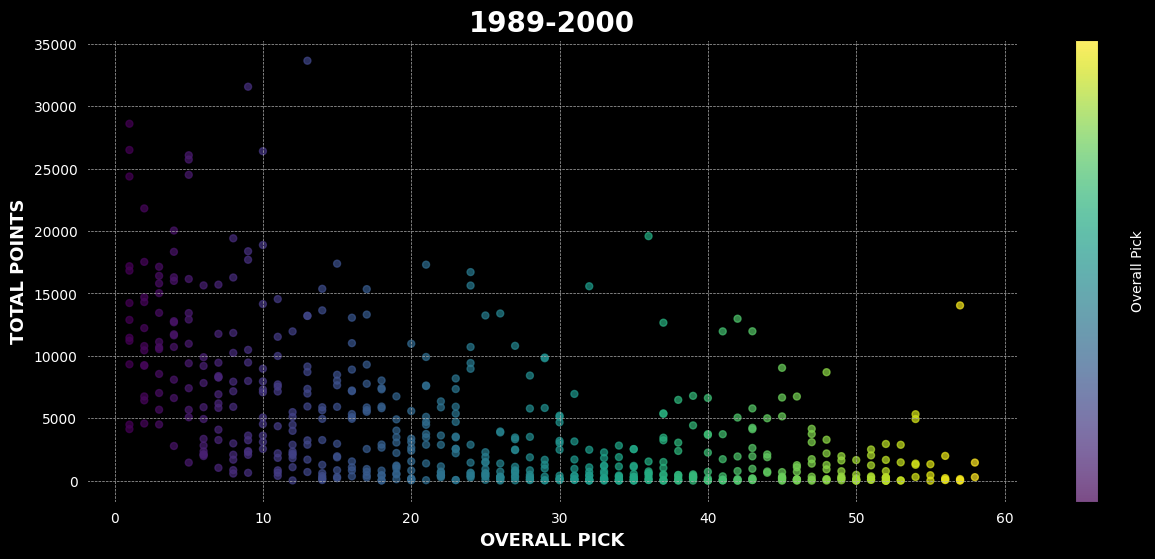

In [36]:
filtered_data = df[(df['year'] >= 1989) & (df['year'] <= 2000)]

plt.figure(figsize=(15, 6), facecolor='black')
ax = plt.axes()
ax.set_facecolor('black')
scatter = plt.scatter(filtered_data['overall_pick'], filtered_data['points'], c=filtered_data['overall_pick'], cmap='viridis', s=25, alpha=0.7)
plt.xlabel('OVERALL PICK', fontsize=13, fontweight='bold', color = 'white')
plt.ylabel('TOTAL POINTS', fontsize=13, fontweight='bold', color = 'white')
plt.xticks(fontsize=10, color = 'white')
plt.yticks(fontsize=10, color = 'white')
cbar = plt.colorbar(scatter, label='Overall Pick')
cbar.ax.yaxis.label.set_color('white')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.title('1989-2000', fontsize = 20, fontweight = 'bold', color = 'white')


plt.show()
plt.close()

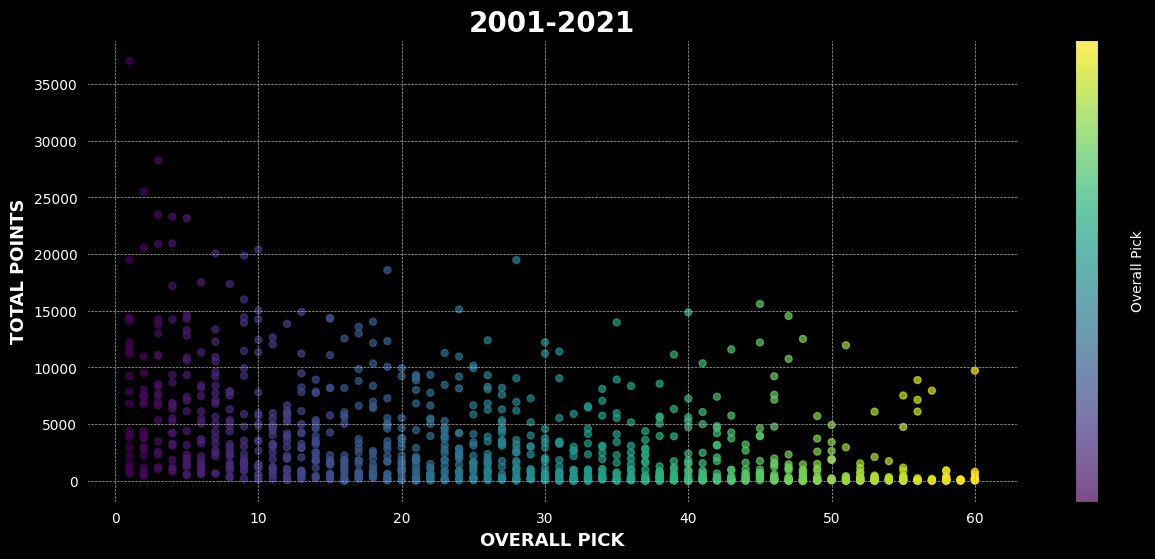

In [37]:
filtered_data = df[(df['year'] > 2000)]

plt.figure(figsize=(15, 6), facecolor='black')
ax = plt.axes()
ax.set_facecolor('black')
scatter = plt.scatter(filtered_data['overall_pick'], filtered_data['points'], c=filtered_data['overall_pick'], cmap='viridis', s=25, alpha=0.7)
plt.xlabel('OVERALL PICK', fontsize=13, fontweight='bold', color = 'white')
plt.ylabel('TOTAL POINTS', fontsize=13, fontweight='bold', color = 'white')
plt.xticks(fontsize=10, color = 'white')
plt.yticks(fontsize=10, color = 'white')
cbar = plt.colorbar(scatter, label='Overall Pick')
cbar.ax.yaxis.label.set_color('white')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.title('2001-2021', fontsize = 20, fontweight = 'bold', color = 'white')

plt.show()
plt.close()

### **Points per game by overall pick.**

> Filtering data:
- deleting null values in games played column
- deleting null values in point per game column
- selecting only players with at least 50 games played



In [38]:
df = data.dropna(subset=['games'])
df = data.dropna(subset=['points_per_game'])
filtered_data = df[(df['games'] > 50)]

### **Creating chart with interactive year slider**

> The summary of the chart indicates that there is a trend observed in the NBA drafts and the scoring performance of players in previous years. Looking at earlier years, such as 1989, it can be noticed that there was a frequent occurrence of players with lower draft picks scoring more points per game compared to those with higher draft picks.
However, as time progressed, this trend became less common. This suggests that NBA teams have improved their player analysis and selection processes. Consequently, the differences in scoring performance between players drafted at different positions have diminished over time.
This indicates that teams now have more advanced tools for talent evaluation and player assessment, leading to more accurate draft choices.



In [39]:
from ipywidgets import interact, Checkbox

def create_plot(year):
    fig, ax = plt.subplots(figsize=(15, 6), facecolor='black')
    ax.set_facecolor('black')

    filtered_data_year = filtered_data[filtered_data['year'] == year]
    scatter = plt.scatter(filtered_data_year['overall_pick'], filtered_data_year['points_per_game'],
                         c=filtered_data_year['overall_pick'], cmap='viridis', s=25, alpha=1)

    plt.xlabel('OVERALL PICK', fontsize=13, fontweight='bold', color='white')
    plt.ylabel('PTS PER GAME', fontsize=13, fontweight='bold', color='white')
    plt.xticks(fontsize=10, color='white')
    plt.yticks(fontsize=10, color='white')

    cbar = fig.colorbar(scatter, ax=ax, label='Overall Pick')
    cbar.ax.yaxis.label.set_color('white')

    ax.grid(True, linestyle='--', linewidth=0.5)
    ax.set_title(str(year), fontsize=20, fontweight='bold', color='white')

    plt.show()

interact(create_plot, year = (1989, 2021))

interactive(children=(IntSlider(value=2005, description='year', max=2021, min=1989), Output()), _dom_classes=(…

<function __main__.create_plot(year)>

### **Points per game by year by selected overall pick**
> This chart shows how specific overall picks performed compared in years.







In [40]:
def create_plot2(pick):
    fig, ax = plt.subplots(figsize=(15, 6), facecolor='black')
    ax.set_facecolor('black')

    filtered_data_year = filtered_data[filtered_data['overall_pick'] == pick]
    scatter = plt.scatter(filtered_data_year['year'], filtered_data_year['points_per_game'],
                         c='red', s=25, alpha=1)

    plt.xlabel('YEAR', fontsize=13, fontweight='bold', color='white')
    plt.ylabel('PTS PER GAME', fontsize=13, fontweight='bold', color='white')
    plt.xticks(fontsize=10, color='white')
    plt.yticks(fontsize=10, color='white')

    ax.grid(True, linestyle='--', linewidth=0.5)
    ax.set_title(f"Overall pick:{str(pick)}", fontsize=20, fontweight='bold', color='white')

    plt.show()

interact(create_plot2, pick = (1, 60))

interactive(children=(IntSlider(value=30, description='pick', max=60, min=1), Output()), _dom_classes=('widget…

<function __main__.create_plot2(pick)>

# **General overall picks breakdown**

> This section breakdowns general data based on overall pick. Breakdown shows obvious things. Players with higher picks stay in the league longer, they play more games and minutes and they have lot better performance.

Of course these data are very general, but they prove that overall pick matters


<ipython-input-41-9c489b8565d0>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = data.groupby('overall_pick').sum().reset_index()


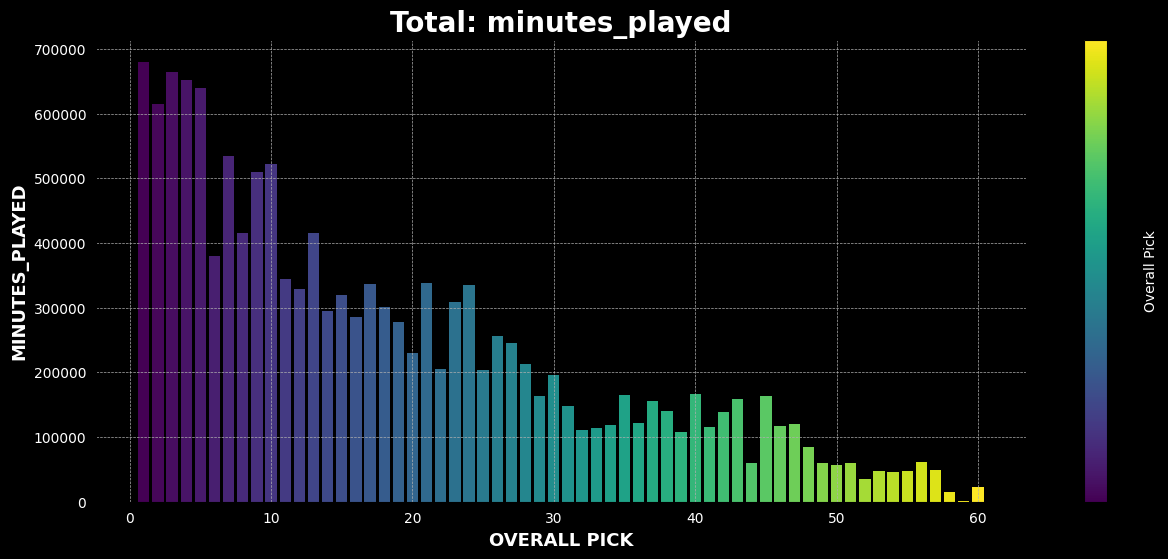

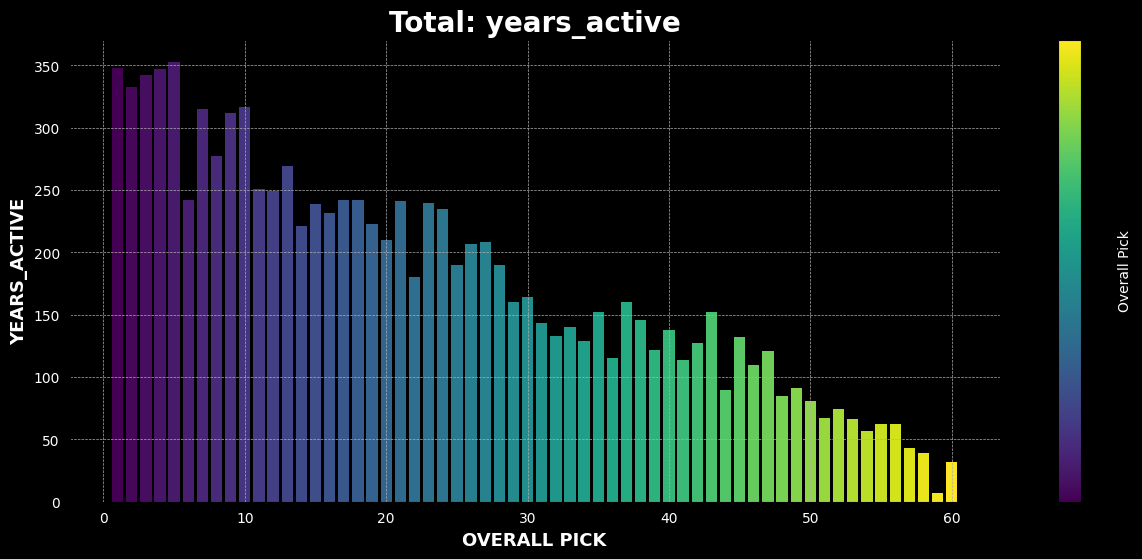

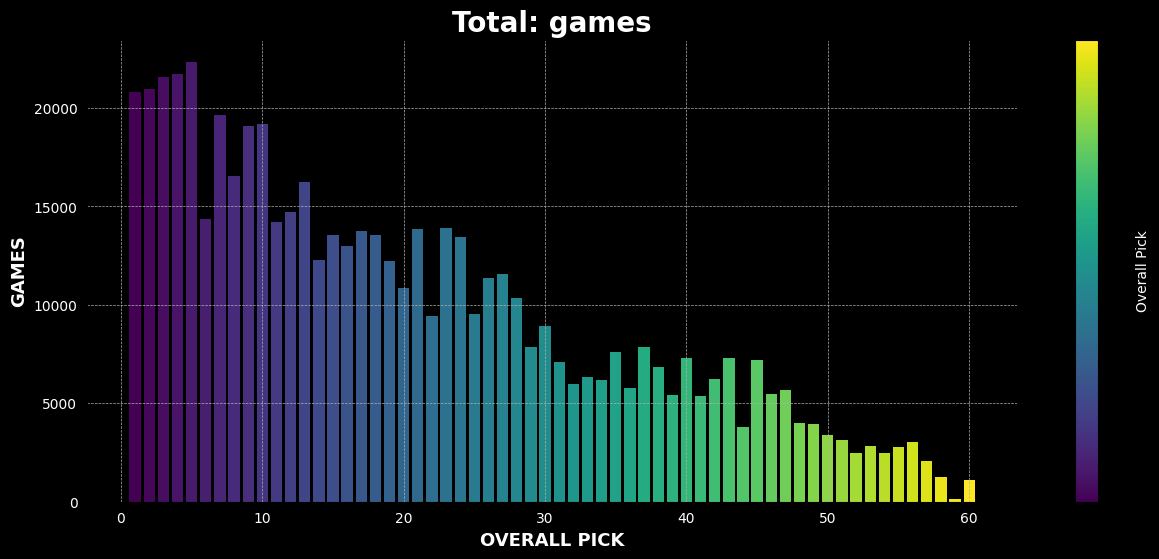

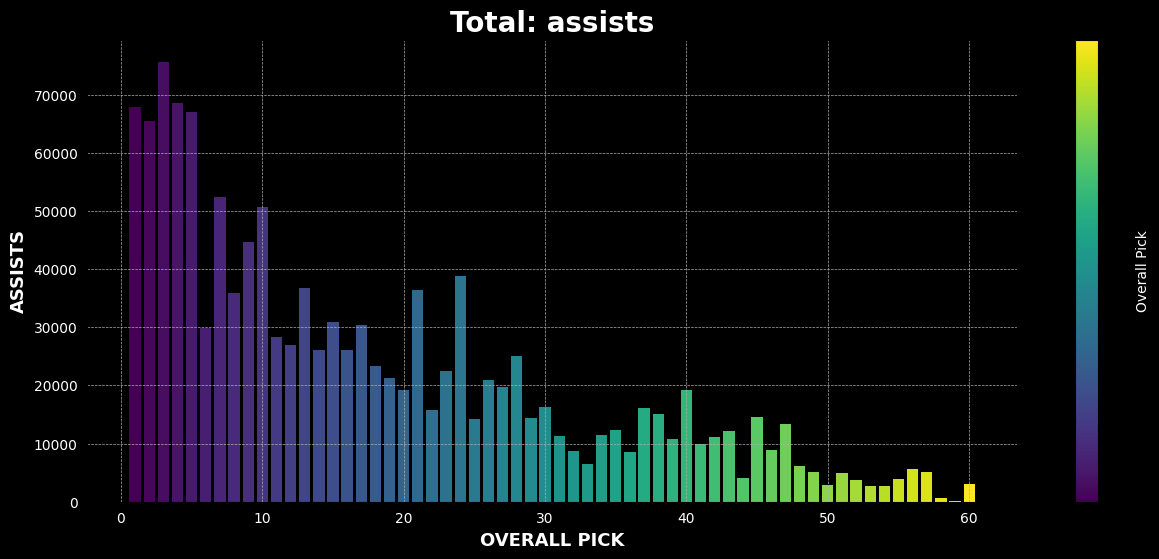

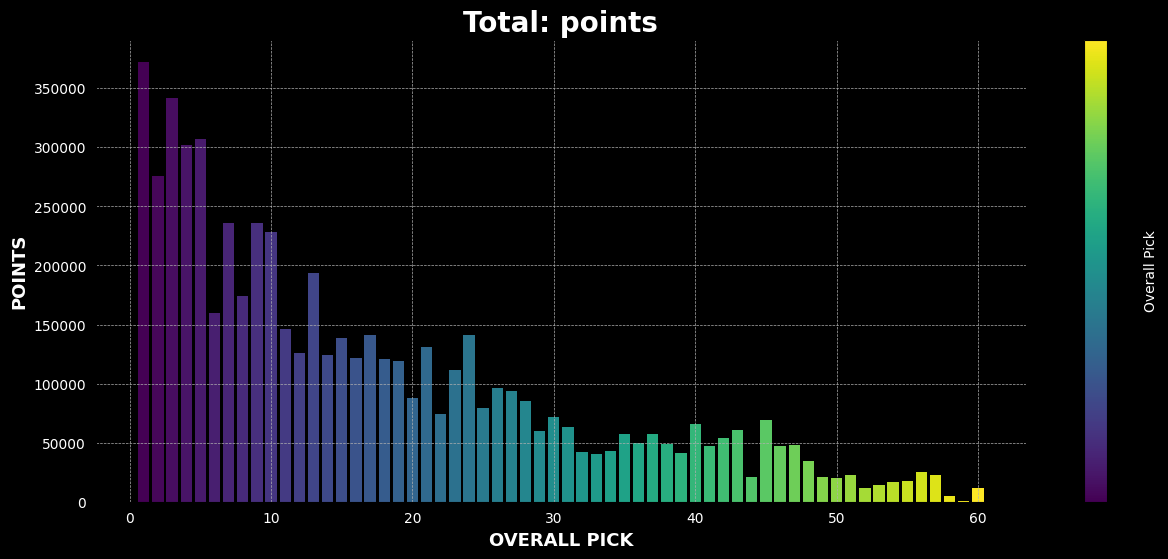

In [41]:
grouped = data.groupby('overall_pick').sum().reset_index()

for column in ['minutes_played', 'years_active', 'games', 'assists', 'points']:
    fig, ax = plt.subplots(figsize=(15, 6), facecolor='black')
    ax.set_facecolor('black')

    colors = plt.cm.viridis(np.linspace(0, 1, len(grouped)))

    plt.bar(grouped['overall_pick'], grouped[column], color=colors)
    plt.xlabel('OVERALL PICK', fontsize=13, fontweight='bold', color='white')
    plt.ylabel(column.upper(), fontsize=13, fontweight='bold', color='white')
    plt.xticks(fontsize=10, color='white')
    plt.yticks(fontsize=10, color='white')

    sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis)
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=ax, label='Overall Pick')
    cbar.ax.yaxis.label.set_color('white')

    ax.grid(True, linestyle='--', linewidth=0.5)
    ax.set_title(f"Total: {column}", fontsize=20, fontweight='bold', color='white')

plt.show()


## **Best players in different categories. What pick were they drafted with?**

### **Top 20 scorers**

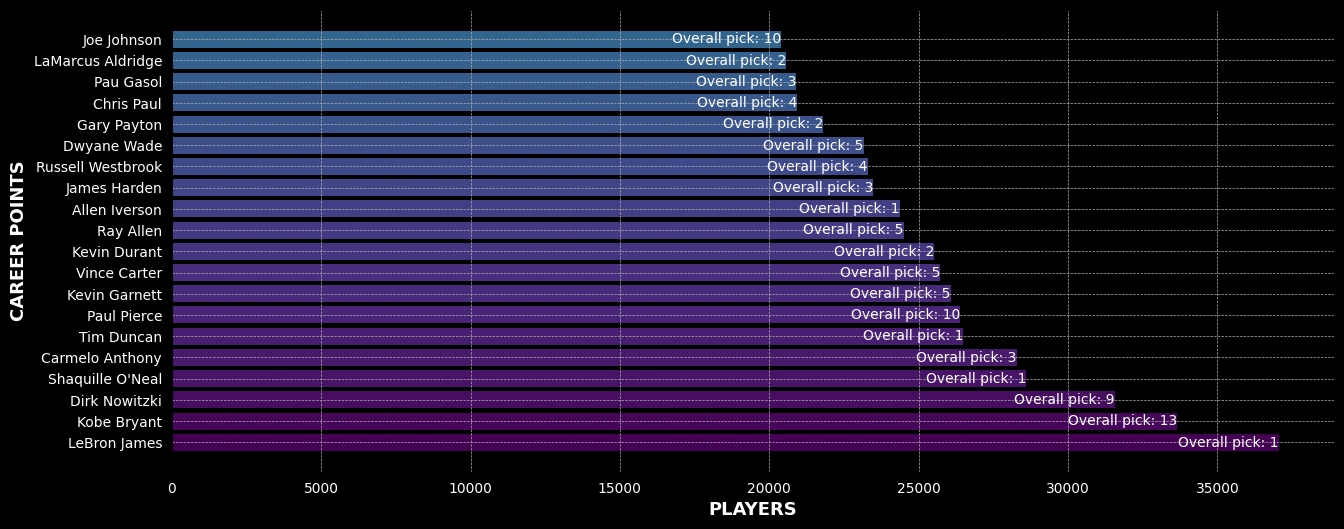

In [42]:
sorted = data.sort_values(by = 'points', ascending=False)

sorted = sorted.head(20)

fig, ax = plt.subplots(figsize=(15, 6), facecolor='black')
ax.set_facecolor('black')
colors = plt.cm.viridis(np.linspace(0, 1, len(grouped)))

bars = plt.barh(sorted['player'], sorted['points'], color = colors)
plt.xlabel('PLAYERS', fontsize=13, fontweight='bold', color='white')
plt.ylabel('CAREER POINTS', fontsize=13, fontweight='bold', color='white')
plt.xticks(fontsize=10, color='white')
plt.yticks(fontsize=10, color='white')

ax.grid(True, linestyle='--', linewidth=0.5)

for bar in bars:
    width = bar.get_width()
    ov_pick = df.loc[df['points'] == width, 'overall_pick'].values[0]
    ax.annotate(f"Overall pick: {str(ov_pick)}", xy=(width, bar.get_y() + bar.get_height() / 2), xytext=(0, 0), textcoords='offset points',  ha = 'right', va='center', color='white', fontsize=10)






### TOP 20 Passers (most assists)



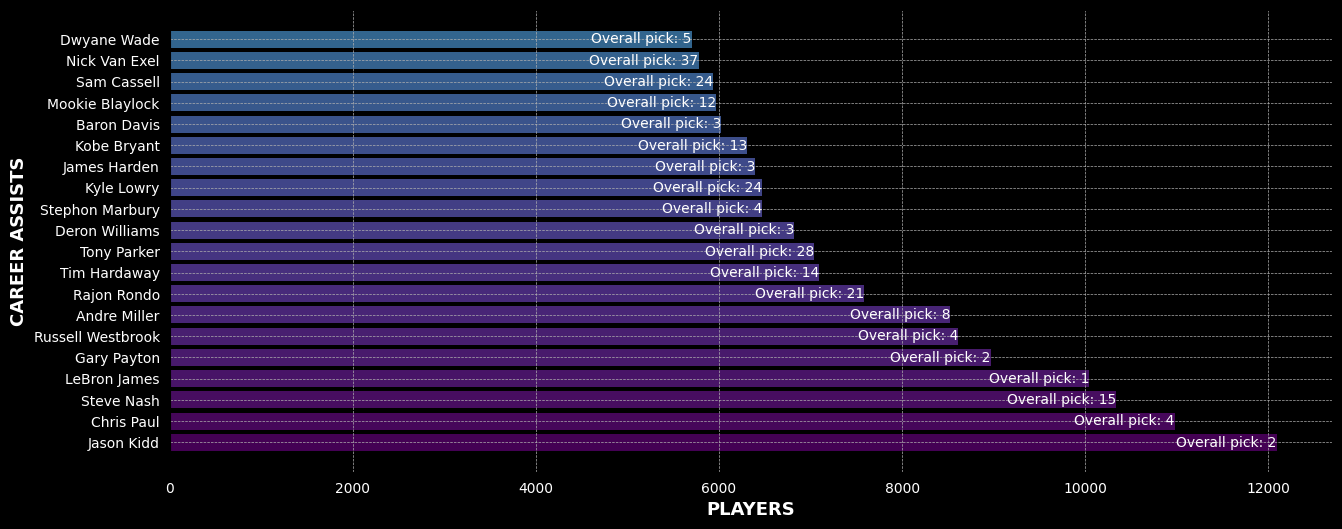

In [43]:
sorted = data.sort_values(by = 'assists', ascending=False)

sorted = sorted.head(20)

fig, ax = plt.subplots(figsize=(15, 6), facecolor='black')
ax.set_facecolor('black')
colors = plt.cm.viridis(np.linspace(0, 1, len(grouped)))

bars = plt.barh(sorted['player'], sorted['assists'], color = colors)
plt.xlabel('PLAYERS', fontsize=13, fontweight='bold', color='white')
plt.ylabel('CAREER ASSISTS', fontsize=13, fontweight='bold', color='white')
plt.xticks(fontsize=10, color='white')
plt.yticks(fontsize=10, color='white')

ax.grid(True, linestyle='--', linewidth=0.5)

for bar in bars:
    width = bar.get_width()
    ov_pick = df.loc[df['assists'] == width, 'overall_pick'].values[0]
    ax.annotate(f"Overall pick: {str(ov_pick)}", xy=(width, bar.get_y() + bar.get_height() / 2), xytext=(0, 0), textcoords='offset points',  ha = 'right', va='center', color='white', fontsize=10)

## TOP 20 Rebounders

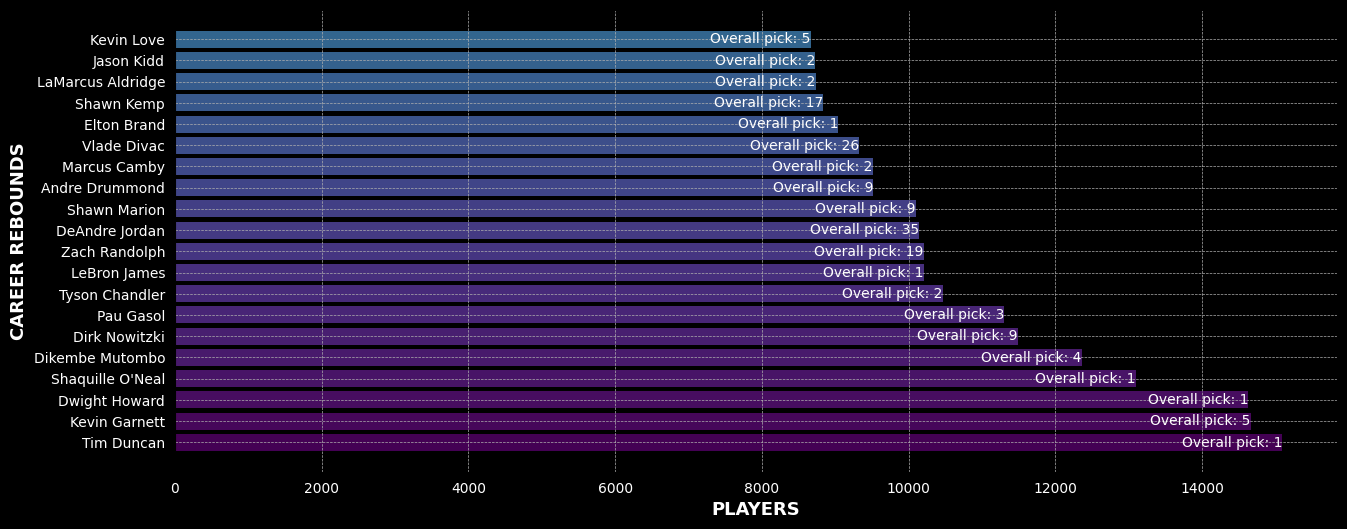

In [44]:
sorted = data.sort_values(by = 'total_rebounds', ascending=False)

sorted = sorted.head(20)

fig, ax = plt.subplots(figsize=(15, 6), facecolor='black')
ax.set_facecolor('black')
colors = plt.cm.viridis(np.linspace(0, 1, len(grouped)))

bars = plt.barh(sorted['player'], sorted['total_rebounds'], color = colors)
plt.xlabel('PLAYERS', fontsize=13, fontweight='bold', color='white')
plt.ylabel('CAREER REBOUNDS', fontsize=13, fontweight='bold', color='white')
plt.xticks(fontsize=10, color='white')
plt.yticks(fontsize=10, color='white')

ax.grid(True, linestyle='--', linewidth=0.5)

for bar in bars:
    width = bar.get_width()
    ov_pick = df.loc[df['total_rebounds'] == width, 'overall_pick'].values[0]
    ax.annotate(f"Overall pick: {str(ov_pick)}", xy=(width, bar.get_y() + bar.get_height() / 2), xytext=(0, 0), textcoords='offset points',  ha = 'right', va='center', color='white', fontsize=10)

## **AVERAGE WIN SHARES BY OVERALL PICK**
- Win shares is an estimate of the number of wins contributed by a player

In [45]:
df = data.dropna(subset=['win_shares'])

In [46]:
df = df.groupby('overall_pick')['win_shares'].mean().reset_index()

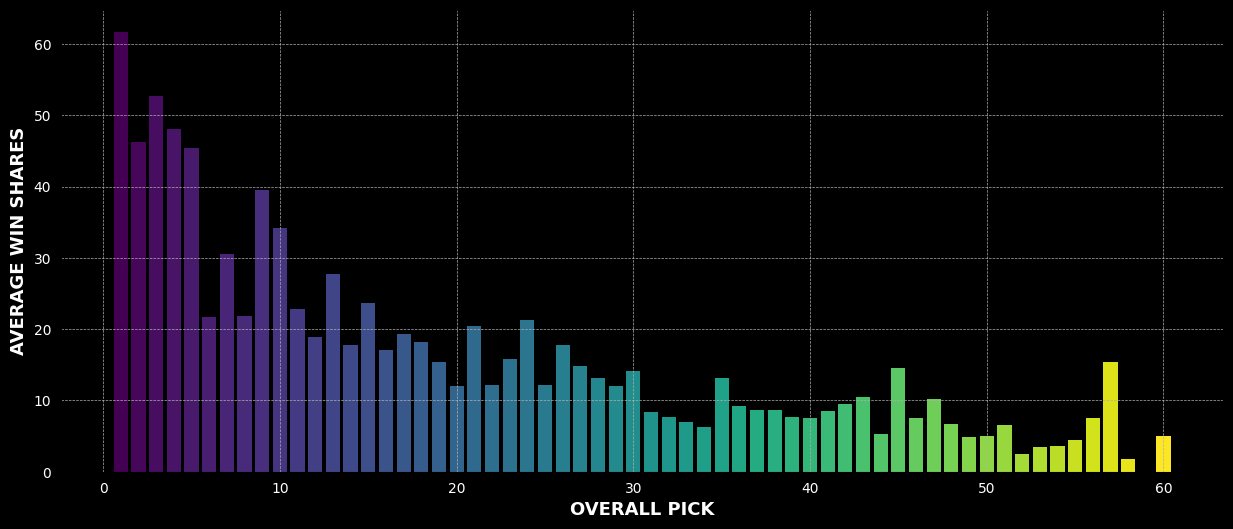

In [47]:
fig, ax = plt.subplots(figsize=(15, 6), facecolor='black')
ax.set_facecolor('black')
colors = plt.cm.viridis(np.linspace(0, 1, len(grouped)))

plt.bar(df['overall_pick'], df['win_shares'], color = colors)
plt.xlabel('OVERALL PICK', fontsize=13, fontweight='bold', color='white')
plt.ylabel('AVERAGE WIN SHARES', fontsize=13, fontweight='bold', color='white')
plt.xticks(fontsize=10, color='white')
plt.yticks(fontsize=10, color='white')

ax.grid(True, linestyle='--', linewidth=0.5)

## AVERAGE VALUE OVER REPLACEMENT BY OVERALL PICK
- Value over Replacement Player (VORP) converts the BPM rate into an estimate of each player's overall contribution to the team

In [48]:
df = data.dropna(subset=['value_over_replacement'])

In [49]:
df = df.groupby('overall_pick')['value_over_replacement'].mean().reset_index()

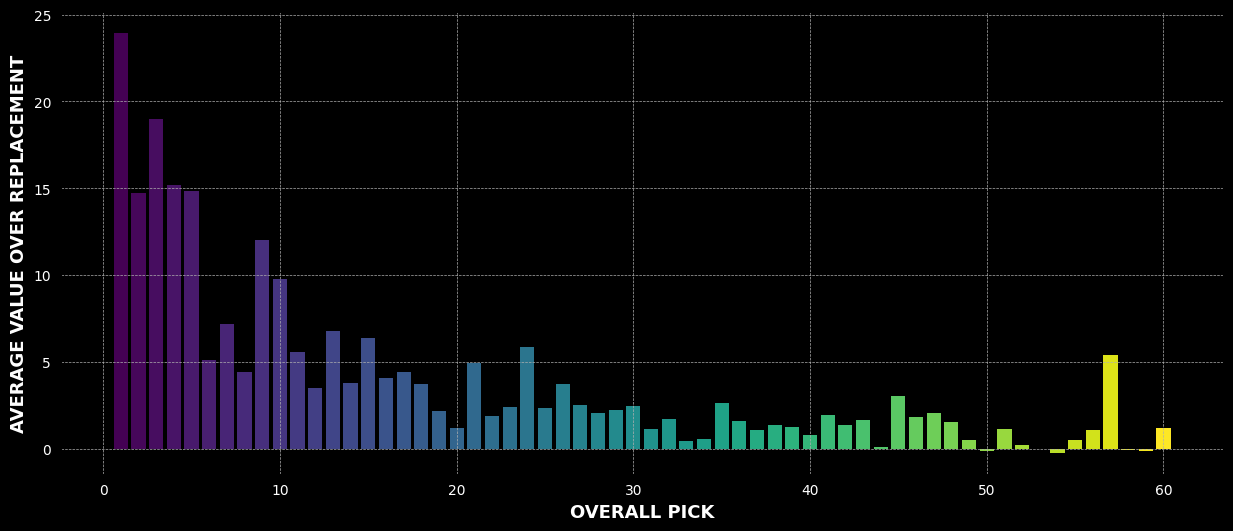

In [50]:
fig, ax = plt.subplots(figsize=(15, 6), facecolor='black')
ax.set_facecolor('black')
colors = plt.cm.viridis(np.linspace(0, 1, len(grouped)))

plt.bar(df['overall_pick'], df['value_over_replacement'], color = colors)
plt.xlabel('OVERALL PICK', fontsize=13, fontweight='bold', color='white')
plt.ylabel('AVERAGE VALUE OVER REPLACEMENT', fontsize=13, fontweight='bold', color='white')
plt.xticks(fontsize=10, color='white')
plt.yticks(fontsize=10, color='white')

ax.grid(True, linestyle='--', linewidth=0.5)